In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
file_path = 'top_insta_influencers_data.csv'
data = pd.read_csv(file_path)

print(data.head())

print(data.isnull().sum())

data.fillna(method='ffill', inplace=True)

def convert_to_numeric(value):
    if 'm' in value:
        return float(value.replace('m', '').replace(',', '').strip()) * 1000000
    elif 'b' in value:
        return float(value.replace('b', '').replace(',', '').strip()) * 1000000000
    elif 'k' in value:
        return float(value.replace('k', '').replace(',', '').strip()) * 1000
    else:
        return float(value.replace(',', '').replace(' ', '').strip())
data['followers'] = data['followers'].apply(convert_to_numeric)
data['avg_likes'] = data['avg_likes'].apply(convert_to_numeric)

   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  
rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_lik

<ipython-input-29-89edcee0c37f>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill for simplicity


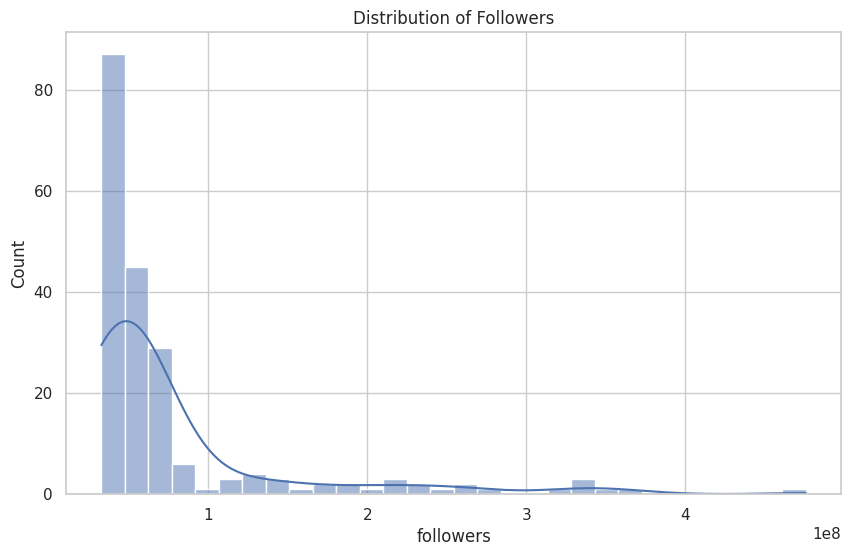

In [43]:
# 1. Distribution of Followers
plt.figure(figsize=(10, 6))
sns.histplot(data['followers'], bins=30, kde=True)
plt.title('Distribution of Followers')
plt.show()

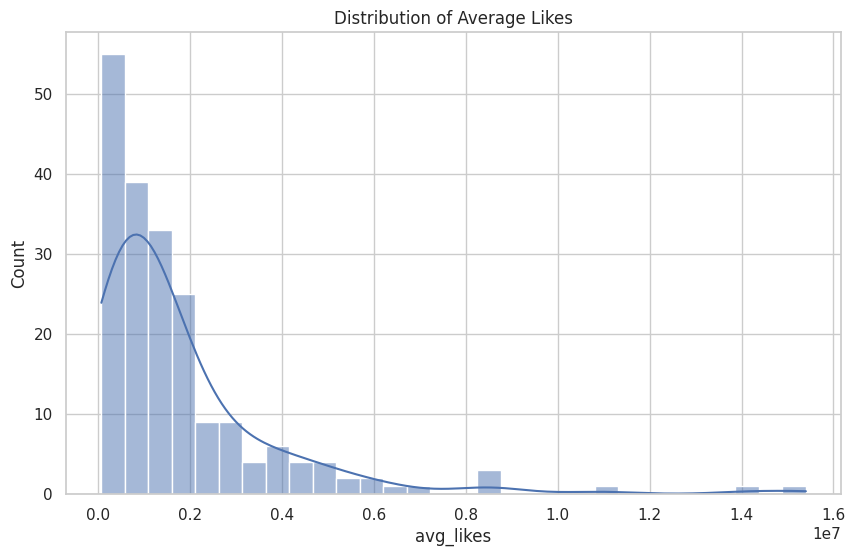

In [44]:
# 2. Distribution of Average Likes
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_likes'], bins=30, kde=True)
plt.title('Distribution of Average Likes')
plt.show()

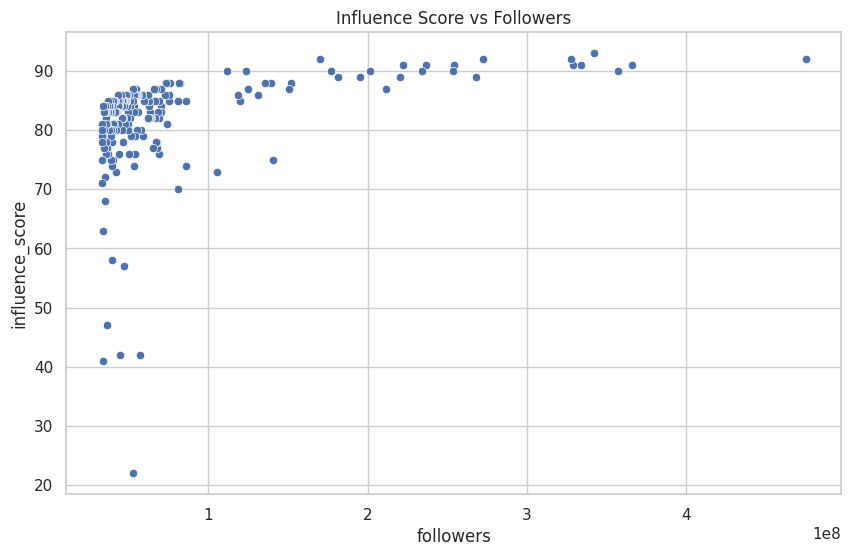

In [45]:
# 3. Influence Score vs Followers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='influence_score', data=data)
plt.title('Influence Score vs Followers')
plt.show()

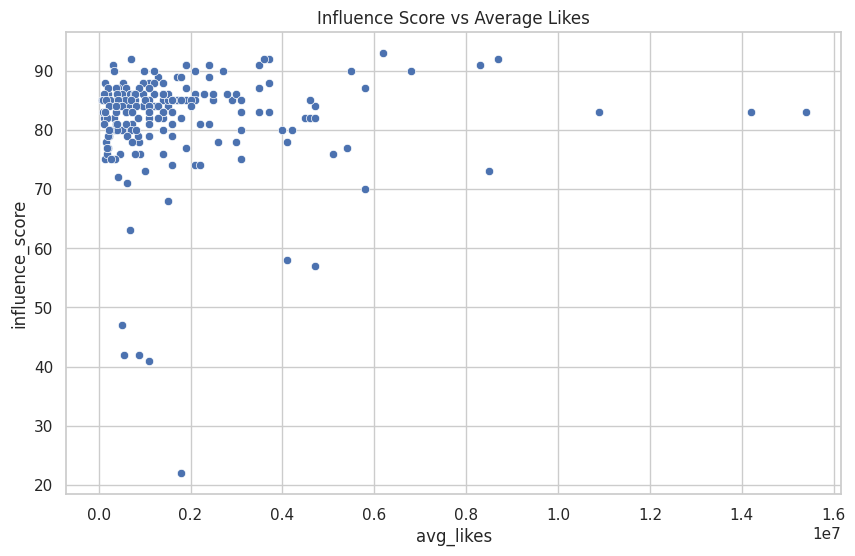

In [46]:
# 4. Influence Score vs Average Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_likes', y='influence_score', data=data)
plt.title('Influence Score vs Average Likes')
plt.show()

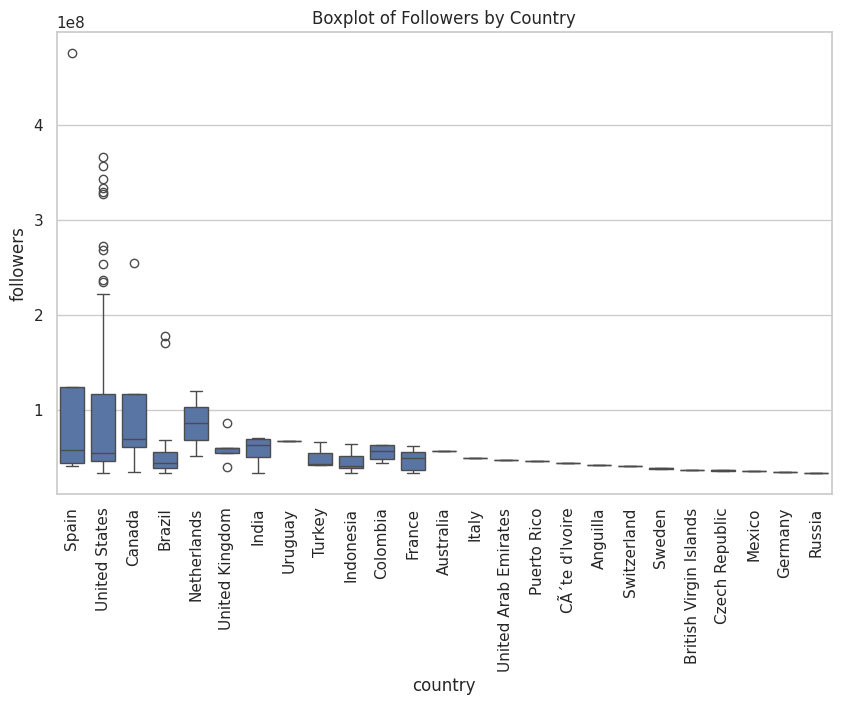

In [47]:
# 5. Boxplot of Followers by Country
plt.figure(figsize=(10, 6))
sns.boxplot(x='country', y='followers', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Followers by Country')
plt.show()

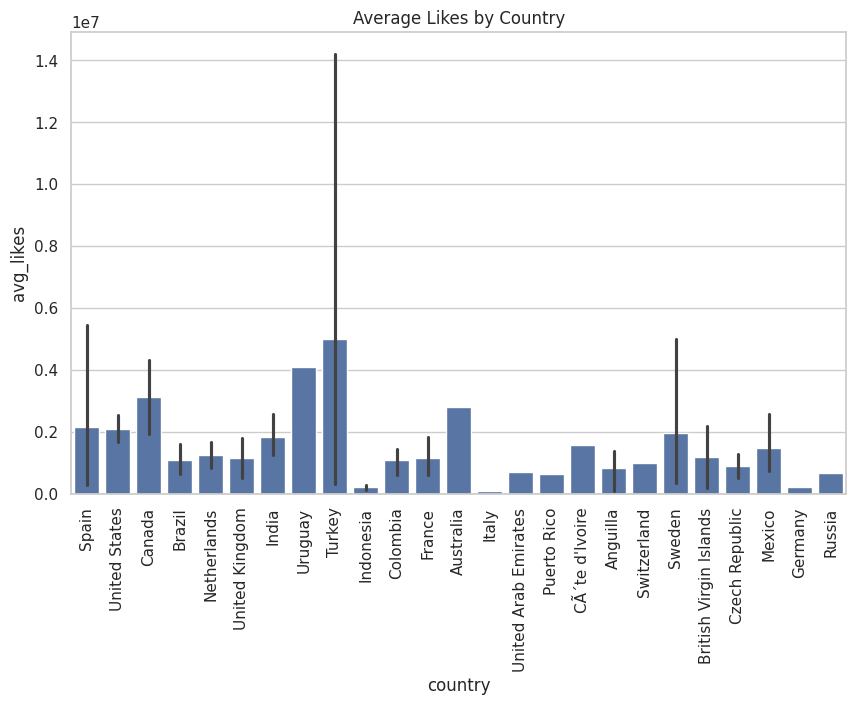

In [48]:
# 6. Average Likes by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='avg_likes', data=data, estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Average Likes by Country')
plt.show()

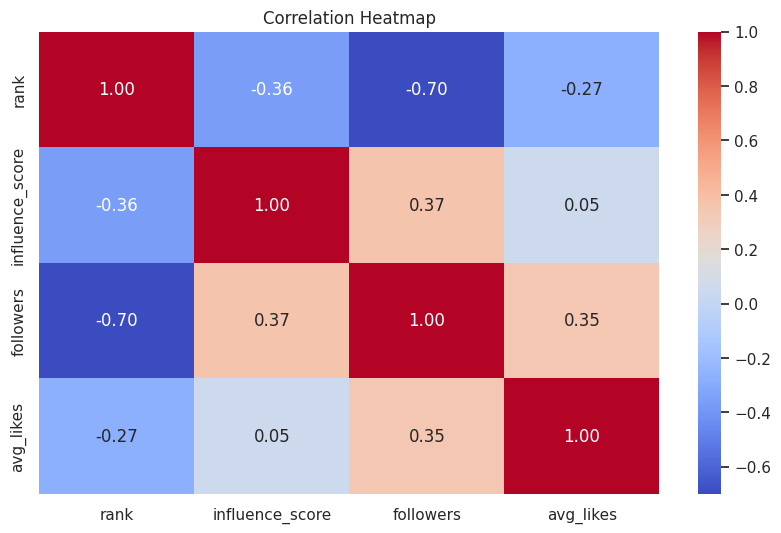

In [51]:
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
# Create the heatmap
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

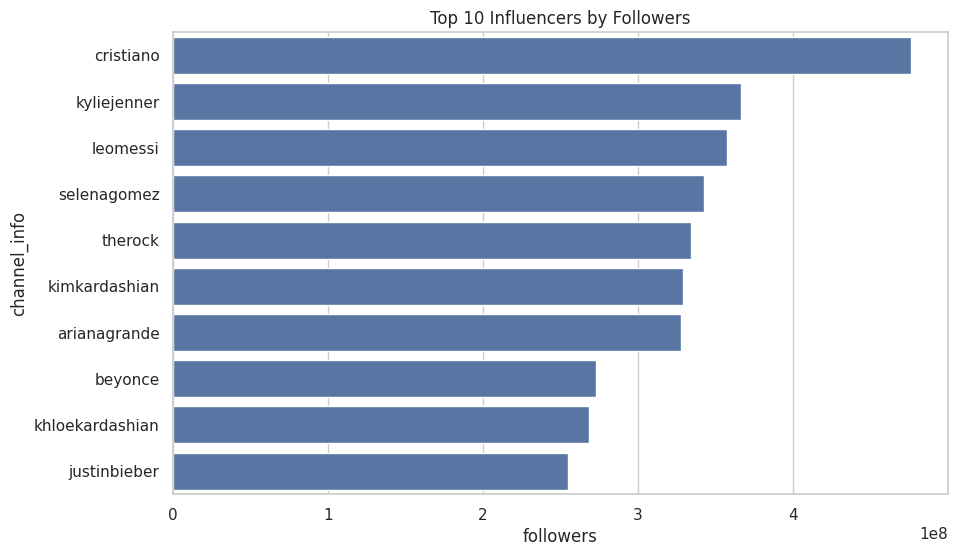

In [52]:
# 8. Top 10 Influencers by Followers
top_followers = data.nlargest(10, 'followers')
plt.figure(figsize=(10, 6))
sns.barplot(x='followers', y='channel_info', data=top_followers)
plt.title('Top 10 Influencers by Followers')
plt.show()

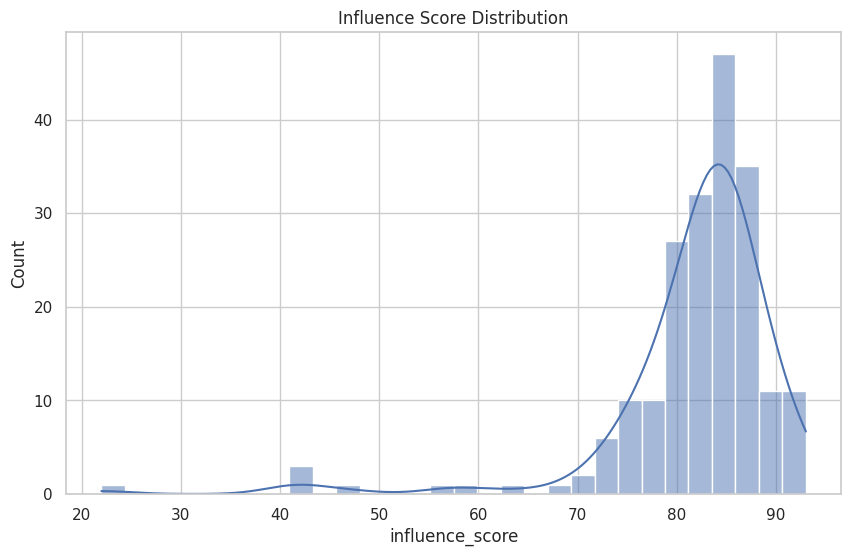

In [54]:
# 10. Influence Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['influence_score'], bins=30, kde=True)
plt.title('Influence Score Distribution')
plt.show()

In [58]:
data['posts'] = pd.to_numeric(data['posts'], errors='coerce')
# Handle any NaN values in 'posts' (you can choose to fill or drop)
data['posts'].fillna(0, inplace=True)  # Filling NaN with 0 for this example
# Create bins for the 'posts' column
bins = [0, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001-50000', '50001-100000', '100001-500000', '500001+']
data['posts_binned'] = pd.cut(data['posts'], bins=bins, labels=labels, right=False)

<ipython-input-58-819f22f1b4b9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['posts'].fillna(0, inplace=True)  # Filling NaN with 0 for this example


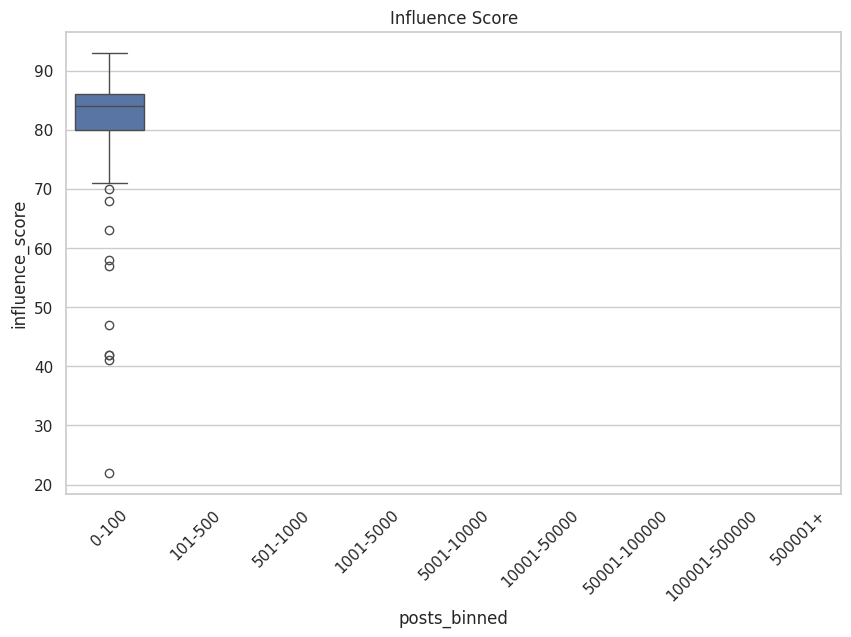

In [64]:
# 11. Posts vs Followers
plt.figure(figsize=(10, 6))
sns.boxplot(x='posts_binned', y='influence_score', data=data)
plt.title('Influence Score')
plt.xticks(rotation=45)
plt.show()

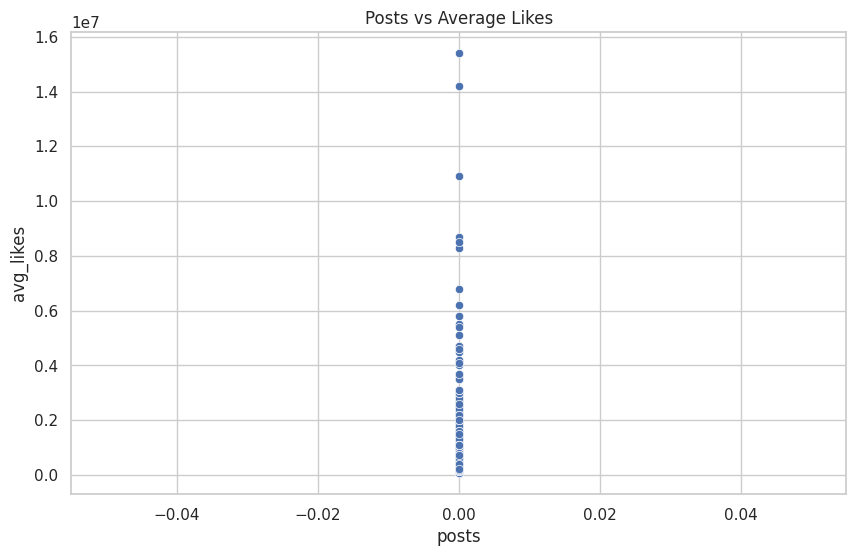

In [60]:
# 12. Posts vs Average Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='posts', y='avg_likes', data=data)
plt.title('Posts vs Average Likes')
plt.show()

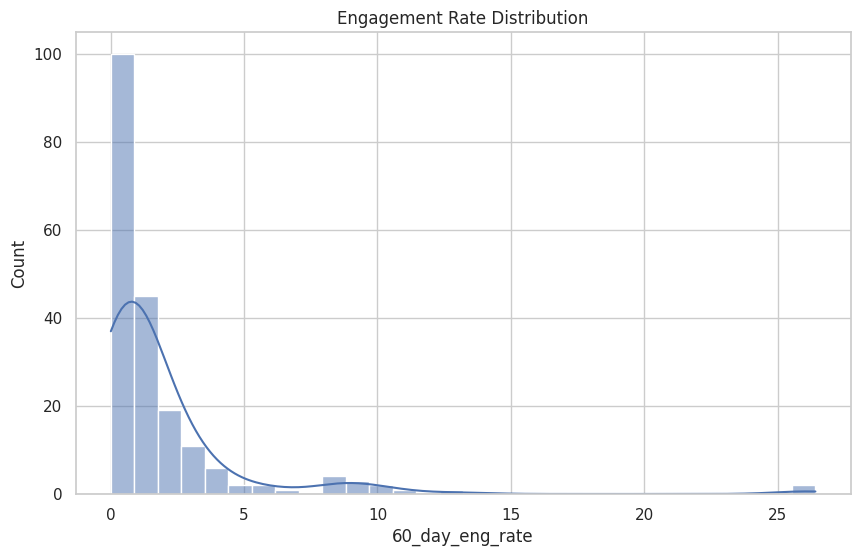

In [61]:
# 13. Engagement Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['60_day_eng_rate'].str.rstrip('%').astype(float), bins=30, kde=True)
plt.title('Engagement Rate Distribution')
plt.show()

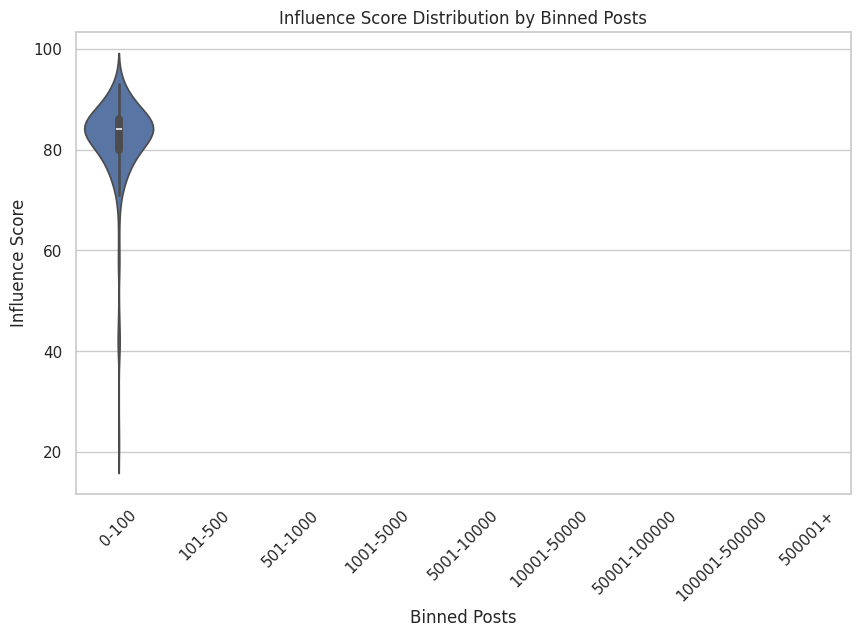

In [66]:
# Violin Plot for Influence Score
plt.figure(figsize=(10, 6))
sns.violinplot(x='posts_binned', y='influence_score', data=data)
plt.title('Influence Score Distribution by Binned Posts')
plt.xlabel('Binned Posts')
plt.ylabel('Influence Score')
plt.xticks(rotation=45)
plt.show()